### Feature Selection-Information gain - mutual information In Regression Problem Statements

##### Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

#### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
numeric_list = ["int64","float64",'int16','int32']
numeric_cols = list(df.select_dtypes(include = numeric_list).columns)

In [10]:
df = df[numeric_cols]

In [11]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
df = df.drop(["Id"],axis=1)

In [15]:
## split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(labels=["SalePrice"],axis=1),df["SalePrice"])

In [16]:
X_train.shape , X_test.shape

((1095, 36), (365, 36))

In [17]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1168,70,120.0,13728,6,7,1935,1986,0.0,626,0,...,540,0,0,0,0,90,0,0,7,2008
1396,20,NaN,57200,5,5,1948,1950,0.0,353,334,...,572,0,0,50,0,0,0,0,6,2010
794,60,NaN,10832,7,5,1994,1996,0.0,0,0,...,409,143,46,0,0,0,0,500,10,2008
230,20,73.0,8760,6,6,1959,1959,220.0,0,0,...,312,0,0,120,0,0,0,0,4,2010
182,20,60.0,9060,5,6,1957,2006,98.0,0,0,...,252,116,0,0,180,0,0,0,6,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,60,70.0,8750,6,5,1998,1998,116.0,505,0,...,523,0,77,0,0,0,0,0,6,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010
152,60,NaN,14803,6,5,1971,1971,252.0,416,0,...,495,0,66,0,0,0,0,0,6,2006
910,90,80.0,11600,5,5,1960,1960,361.0,443,0,...,480,0,0,0,0,0,0,0,1,2010


In [18]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      184
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       65
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [19]:
from sklearn.feature_selection import mutual_info_regression
##determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0),y_train)
mutual_info

array([0.30841792, 0.23586259, 0.15462708, 0.58178816, 0.09312221,
       0.3679921 , 0.24153484, 0.10243839, 0.14964252, 0.        ,
       0.13277498, 0.41097697, 0.32550098, 0.20517156, 0.00595624,
       0.47934053, 0.01719961, 0.00331197, 0.27017086, 0.09297024,
       0.0479468 , 0.02795241, 0.20032405, 0.18792706, 0.26737862,
       0.3645902 , 0.39284821, 0.11726499, 0.15908737, 0.02517384,
       0.        , 0.00871999, 0.00269628, 0.00059775, 0.02729039,
       0.        ])

In [20]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

OverallQual      0.581788
GrLivArea        0.479341
TotalBsmtSF      0.410977
GarageArea       0.392848
YearBuilt        0.367992
GarageCars       0.364590
1stFlrSF         0.325501
MSSubClass       0.308418
FullBath         0.270171
GarageYrBlt      0.267379
YearRemodAdd     0.241535
LotFrontage      0.235863
2ndFlrSF         0.205172
TotRmsAbvGrd     0.200324
Fireplaces       0.187927
OpenPorchSF      0.159087
LotArea          0.154627
BsmtFinSF1       0.149643
BsmtUnfSF        0.132775
WoodDeckSF       0.117265
MasVnrArea       0.102438
OverallCond      0.093122
HalfBath         0.092970
BedroomAbvGr     0.047947
KitchenAbvGr     0.027952
MoSold           0.027290
EnclosedPorch    0.025174
BsmtFullBath     0.017200
ScreenPorch      0.008720
LowQualFinSF     0.005956
BsmtHalfBath     0.003312
PoolArea         0.002696
MiscVal          0.000598
BsmtFinSF2       0.000000
3SsnPorch        0.000000
YrSold           0.000000
dtype: float64

<AxesSubplot:>

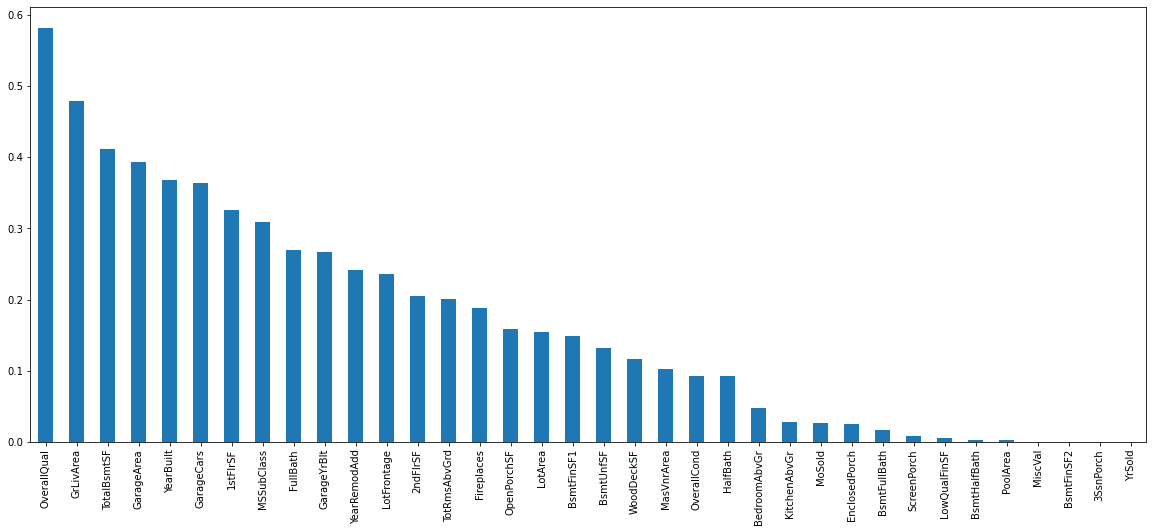

In [21]:
##LET'S PLOT THE ORDERED MUTUAL_INFO VALUES PER FEATURE
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20,8))

In [22]:
from sklearn.feature_selection import SelectKBest

In [25]:
## No we will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_regression,k=10)
sel_five_cols.fit(X_train.fillna(0),y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [26]:
from sklearn.feature_selection import SelectPercentile

In [29]:
## No we will select the top 5 important features
sel_five_cols = SelectPercentile(mutual_info_regression,percentile=20)
sel_five_cols.fit(X_train.fillna(0),y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [30]:
sel_five_cols.get_support() ## whichever feature  lies in top 20 percentile, they are assigned as true

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])